In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    'weight': np.linspace(55,95,100),
    'obesed': np.hstack((np.zeros(50),np.ones(50)))
}
df = pd.DataFrame(data)
df

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
95,93.383838,1.0
96,93.787879,1.0
97,94.191919,1.0
98,94.595960,1.0


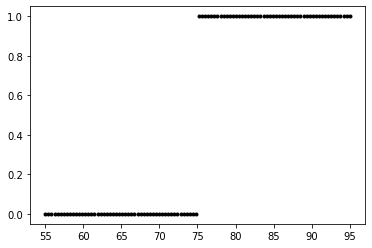

In [5]:
plt.plot(df['weight'], df['obesed'], 'k.')

In [7]:
half = int(len(df)/2)
df.iloc[half-1]

weight    74.79798
obesed     0.00000
Name: 49, dtype: float64

In [8]:
copy = df.copy()
copy2 = df.copy()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(df[['weight']], df['obesed'])
df['pred'] = lr.predict(df[['weight']])

In [11]:
df

,weight,obesed,pred
0,55.000000,0.0,-0.242574
1,55.404040,0.0,-0.227573
2,55.808081,0.0,-0.212571
3,56.212121,0.0,-0.197570
4,56.616162,0.0,-0.182568
...,...,...,...
95,93.383838,1.0,1.182568
96,93.787879,1.0,1.197570
97,94.191919,1.0,1.212571
98,94.595960,1.0,1.227573


In [13]:
print(lr.coef_[0])
print(lr.intercept_)

0.037128712871287134
-2.284653465346535


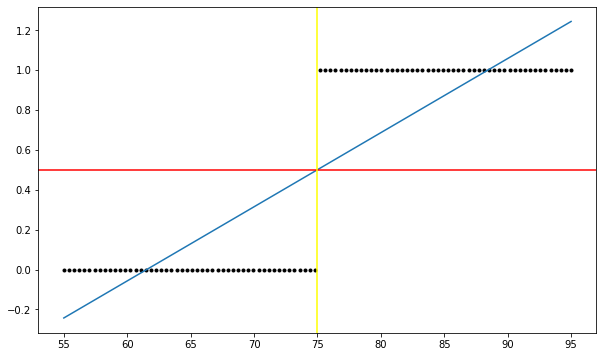

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df['weight'],df['obesed'],'k.')
plt.plot(df['weight'], df['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0, ymax=1, color='yellow')

plt.show()

In [15]:
df['obesed_pred'] = df['pred'].apply(lambda x: 0 if x < 0.5 else 1)
df

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,-0.242574,0
1,55.404040,0.0,-0.227573,0
2,55.808081,0.0,-0.212571,0
3,56.212121,0.0,-0.197570,0
4,56.616162,0.0,-0.182568,0
...,...,...,...,...
95,93.383838,1.0,1.182568,1
96,93.787879,1.0,1.197570,1
97,94.191919,1.0,1.212571,1
98,94.595960,1.0,1.227573,1


In [16]:
print(df.iloc[half])
print("\n")
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64


weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [18]:
new_row = pd.DataFrame({'weight': [159,160,154,143], 'obesed': [1,1,1,1]})
copy = pd.concat([copy, new_row], axis=0, ignore_index=True)

In [19]:
copy

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [20]:
copy2 = copy.copy()
copy2

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [21]:
lrb = LinearRegression()
lrb.fit(copy[['weight']], copy['obesed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
copy['pred'] = lrb.predict(copy[['weight']])
copy

,weight,obesed,pred
0,55.000000,0.0,0.118695
1,55.404040,0.0,0.125719
2,55.808081,0.0,0.132744
3,56.212121,0.0,0.139768
4,56.616162,0.0,0.146793
...,...,...,...
99,95.000000,1.0,0.814116
100,159.000000,1.0,1.926790
101,160.000000,1.0,1.944175
102,154.000000,1.0,1.839862


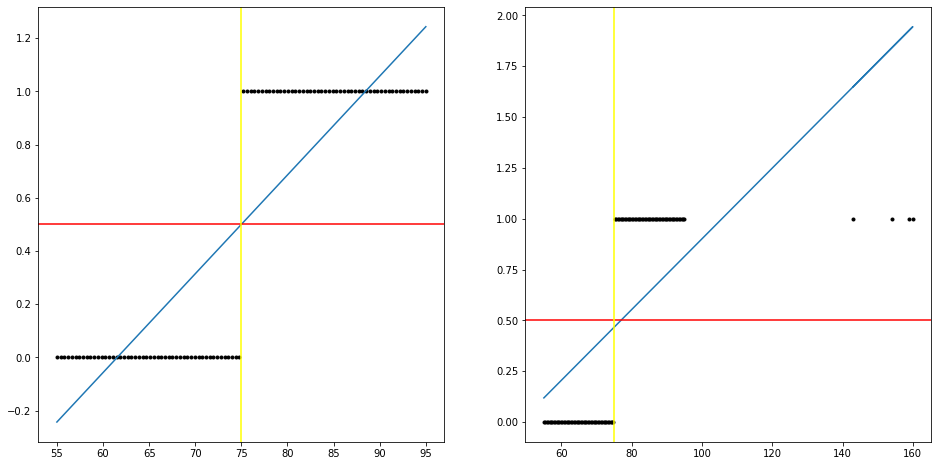

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(df['weight'], df['obesed'], 'k.')
plt.plot(df['weight'], df['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0,ymax=1, color='yellow')

plt.subplot(122)
plt.plot(copy['weight'], copy['obesed'], 'k.')
plt.plot(copy['weight'], copy['pred'])
plt.axhline(0.5, color='red')
plt.axvline(x=75, ymin=0,ymax=1, color='yellow')

In [24]:
copy['obesed_pred'] = copy['pred'].apply(lambda x: 0 if x < 0.5 else 1)
copy

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,0.118695,0
1,55.404040,0.0,0.125719,0
2,55.808081,0.0,0.132744,0
3,56.212121,0.0,0.139768,0
4,56.616162,0.0,0.146793,0
...,...,...,...,...
99,95.000000,1.0,0.814116,1
100,159.000000,1.0,1.926790,1
101,160.000000,1.0,1.944175,1
102,154.000000,1.0,1.839862,1


In [25]:
print(df.iloc[half])
print('\n')
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64


weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [31]:
print(copy.iloc[half+5])
print('\n')
print(copy.iloc[half+4])
print('\n')
print(copy.iloc[half+3])
print('\n')
print(copy.iloc[half+2])
print('\n')
print(copy.iloc[half+1])
print('\n')
print(copy.iloc[half])

weight         77.222222
obesed          1.000000
pred            0.505040
obesed_pred     1.000000
Name: 55, dtype: float64


weight         76.818182
obesed          1.000000
pred            0.498016
obesed_pred     0.000000
Name: 54, dtype: float64


weight         76.414141
obesed          1.000000
pred            0.490991
obesed_pred     0.000000
Name: 53, dtype: float64


weight         76.010101
obesed          1.000000
pred            0.483967
obesed_pred     0.000000
Name: 52, dtype: float64


weight         75.606061
obesed          1.000000
pred            0.476942
obesed_pred     0.000000
Name: 51, dtype: float64


weight         75.202020
obesed          1.000000
pred            0.469918
obesed_pred     0.000000
Name: 50, dtype: float64


## Logistic Regression
Sigmoid Function

$\displaystyle sig(t) \hat{y} = \frac{1}{1+e^{-(mx+c)}}$

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()
logreg.fit(copy2[['weight']], copy2['obesed'])
print("b/m/slope", logreg.coef_[0])
print("a/c/intercept", logreg.intercept_[0])

b/m/slope [1.60239997]
a/c/intercept -120.17999785994184


In [34]:
b = logreg.coef_[0][0]
a = logreg.intercept_[0]
b,a

(1.6023999673056772, -120.17999785994184)

In [38]:
copy2['pred'] = logreg.predict(copy2[['weight']])
copy2['proba1'] = 1 / (1+np.exp(-1*(b*copy2['weight'] + a)))
copy2['proba0'] = 1 - copy2['proba1']
copy2

,weight,obesed,pred,proba1,proba0
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00
...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00


In [41]:
copy2.iloc[half-1]

weight    74.79798
obesed     0.00000
pred       0.00000
proba1     0.41977
proba0     0.58023
Name: 49, dtype: float64

In [42]:
df.iloc[half-1]

weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64

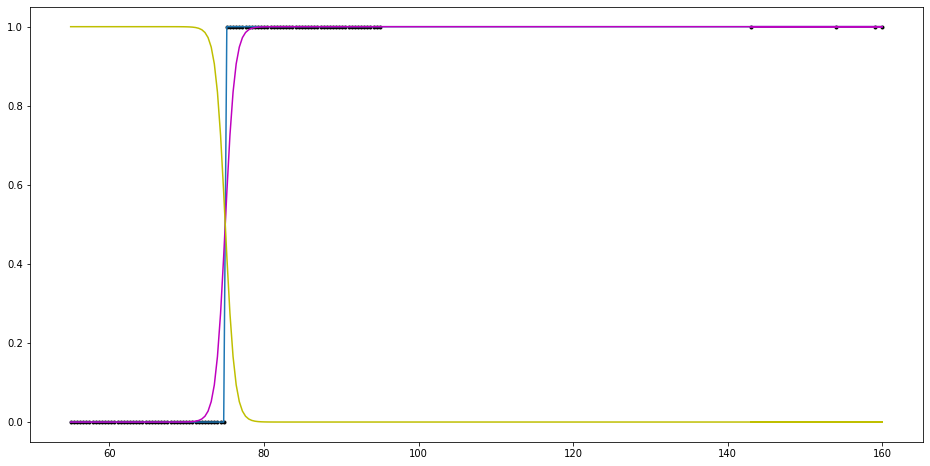

In [43]:
plt.figure(figsize=(16,8))
plt.plot(copy2['weight'], copy2['obesed'], 'k.')
plt.plot(copy2['weight'], copy2['pred'])
plt.plot(copy2['weight'], copy2['proba1'], 'm-')
plt.plot(copy2['weight'], copy2['proba0'], 'y-')

In [46]:
logreg.predict_proba(copy2[['weight']])

array([[1.00000000e+00, 1.20706482e-14],
       [1.00000000e+00, 2.30625725e-14],
       [1.00000000e+00, 4.40641002e-14],
       [1.00000000e+00, 8.41903012e-14],
       [1.00000000e+00, 1.60856724e-13],
       [1.00000000e+00, 3.07338083e-13],
       [1.00000000e+00, 5.87210124e-13],
       [1.00000000e+00, 1.12194274e-12],
       [1.00000000e+00, 2.14362024e-12],
       [1.00000000e+00, 4.09567046e-12],
       [1.00000000e+00, 7.82532102e-12],
       [1.00000000e+00, 1.49513125e-11],
       [1.00000000e+00, 2.85664634e-11],
       [1.00000000e+00, 5.45800128e-11],
       [1.00000000e+00, 1.04282345e-10],
       [1.00000000e+00, 1.99245237e-10],
       [1.00000000e+00, 3.80684421e-10],
       [9.99999999e-01, 7.27348021e-10],
       [9.99999999e-01, 1.38969475e-09],
       [9.99999997e-01, 2.65519593e-09],
       [9.99999995e-01, 5.07310359e-09],
       [9.99999990e-01, 9.69283646e-09],
       [9.99999981e-01, 1.85194480e-08],
       [9.99999965e-01, 3.53838584e-08],
       [9.999999

In [47]:
copy2['skproba1'] = logreg.predict_proba(copy2[['weight']])[:,1]
copy2['skproba0'] = logreg.predict_proba(copy2[['weight']])[:,0]
copy2

,weight,obesed,pred,proba1,proba0,skproba1,skproba0
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00,1.207065e-14,1.000000e+00
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00,2.306257e-14,1.000000e+00
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00,4.406410e-14,1.000000e+00
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00,8.419030e-14,1.000000e+00
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00,1.608567e-13,1.000000e+00
...,...,...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14,1.000000e+00,1.199041e-14
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [53]:
copy2['t0.8'] = copy2['skproba1'].apply(lambda x: 0 if x <= 0.7 else 1)
copy2

,weight,obesed,pred,proba1,proba0,skproba1,skproba0,t0.8
0,55.000000,0.0,0.0,1.207065e-14,1.000000e+00,1.207065e-14,1.000000e+00,0
1,55.404040,0.0,0.0,2.306257e-14,1.000000e+00,2.306257e-14,1.000000e+00,0
2,55.808081,0.0,0.0,4.406410e-14,1.000000e+00,4.406410e-14,1.000000e+00,0
3,56.212121,0.0,0.0,8.419030e-14,1.000000e+00,8.419030e-14,1.000000e+00,0
4,56.616162,0.0,0.0,1.608567e-13,1.000000e+00,1.608567e-13,1.000000e+00,0
...,...,...,...,...,...,...,...,...
99,95.000000,1.0,1.0,1.000000e+00,1.199041e-14,1.000000e+00,1.199041e-14,1
100,159.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1
101,160.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1
102,154.000000,1.0,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1


In [54]:
copy2[copy2['skproba1']>=0.7]

,weight,obesed,pred,proba1,proba0,skproba1,skproba0,t0.8
51,75.606061,1.0,1.0,0.725349,2.746511e-01,0.725349,2.746511e-01,1
52,76.010101,1.0,1.0,0.834600,1.654000e-01,0.834600,1.654000e-01,1
53,76.414141,1.0,1.0,0.906023,9.397656e-02,0.906023,9.397656e-02,1
54,76.818182,1.0,1.0,0.948508,5.149247e-02,0.948508,5.149247e-02,1
55,77.222222,1.0,1.0,0.972371,2.762854e-02,0.972371,2.762854e-02,1
56,77.626263,1.0,1.0,0.985347,1.465337e-02,0.985347,1.465337e-02,1
57,78.030303,1.0,1.0,0.992277,7.723324e-03,0.992277,7.723324e-03,1
58,78.434343,1.0,1.0,0.995943,4.057221e-03,0.995943,4.057221e-03,1
59,78.838384,1.0,1.0,0.997872,2.127611e-03,0.997872,2.127611e-03,1
60,79.242424,1.0,1.0,0.998885,1.114694e-03,0.998885,1.114694e-03,1


In [55]:
from sklearn.metrics import plot_confusion_matrix

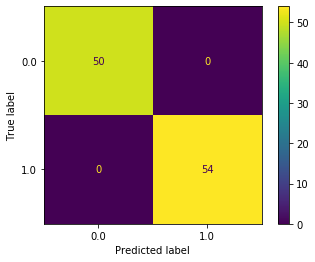

In [56]:
disp = plot_confusion_matrix(logreg, copy2[['weight']], copy2['obesed'])

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [59]:
accuracy_score(copy2['obesed'], copy2['pred'])

1.0

In [60]:
recall_score(copy2['obesed'], copy2['pred'], pos_label=1)

1.0

In [62]:
recall_score(copy2['obesed'], copy2['pred'], pos_label=0)

1.0

In [63]:
precision_score(copy2['obesed'], copy2['pred'], pos_label=1)

1.0

In [64]:
precision_score(copy2['obesed'], copy2['pred'], pos_label=0)

1.0

In [65]:
f1_score(copy2['obesed'], copy2['pred'])

1.0

In [66]:
weight = copy2[['weight', 'obesed']]
weight

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [71]:
from sklearn.model_selection import train_test_split
X = weight[['weight']]
y = weight['obesed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=42)

In [72]:
len(X_train)

67

In [73]:
len(X_test)

37

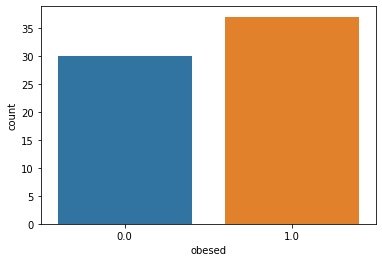

In [74]:
concat_train = pd.concat([X_train, y_train], axis=1)
sns.countplot(x='obesed', data=concat_train)

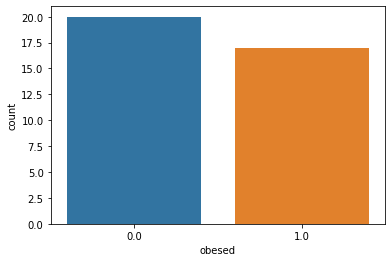

In [75]:
concat_test = pd.concat([X_test, y_test],axis=1)
sns.countplot(x='obesed', data=concat_test)